#### Class activity - Workshop 3 Challenge: 

##### Alejandro Gil
##### Juan David Sánchez
1. Add and organize this example according to the Data Science Workflow
2. Apply the workflow to the wine dataset
3. Complete the steps in the Supervised Learning Workflow for Data Science according to data preparation and per-model requirements and recommendations in this course, up-to-date
4. **Compare the classification performance using the complete set of original features and using only two PCA-transformed features.**
5. Modify the example to perform only a binary classification (good > 6) and compare your results with the multiclass performance

##### Wine Dataset Description
The Wine Quality dataset contains features like acidity, pH, alcohol content, and quality ratings. We'll convert the quality ratings into a binary classification problem.

* Number of instances: 1599
* Features: 11 physicochemical properties
* Target: Binary (Good/Poor quality) and multiclass (Poor, Fair, and Good quality)
* Features include:
* Fixed acidity
* Volatile acidity
* Citric acid
* Residual sugar
* Chlorides
* Free sulfur dioxide
* Total sulfur dioxide
* Density
* pH
* Sulphates
* Alcohol

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


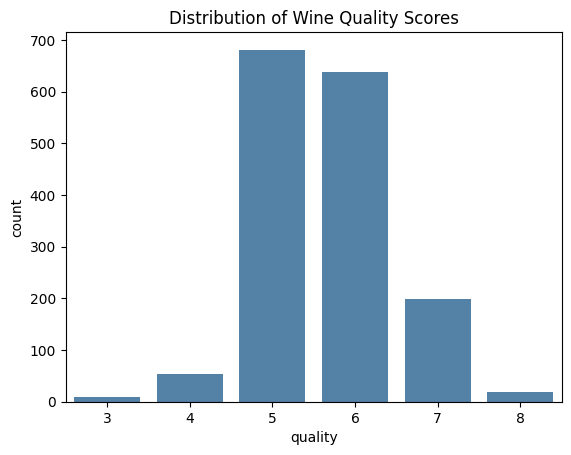

In [82]:
# Load wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print(df.info())

plt.figure()
sns.countplot(data=df, x='quality', color='steelblue', order=sorted(df['quality'].unique()))
plt.title('Distribution of Wine Quality Scores')
plt.show()

##### Multiclass Classification

Three-Class Distribution:
 quality_class
poor    744
fair    638
good    217
Name: count, dtype: int64


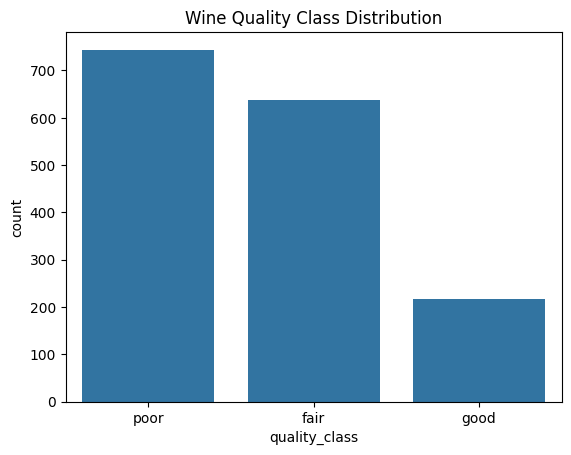

In [83]:
# Convert quality scores to three classes
def quality_to_class(quality):
    if quality <= 5:
        return 'poor'
    elif quality <= 6:
        return 'fair'
    else:
        return 'good'

# Add new column with three classes
df['quality_class'] = df['quality'].apply(quality_to_class)

# Show distribution of new classes
print("Three-Class Distribution:\n", df['quality_class'].value_counts())


# Visualize class distribution
plt.figure()
sns.countplot(data=df, x='quality_class', order=['poor', 'fair', 'good'])
plt.title('Wine Quality Class Distribution')
plt.show()

Baseline Model Performance:
Accuracy: 0.5594
Training time: 0.0058 seconds

              precision    recall  f1-score   support

        fair       0.50      0.52      0.51       128
        good       0.47      0.37      0.42        43
        poor       0.63      0.65      0.64       149

    accuracy                           0.56       320
   macro avg       0.53      0.51      0.52       320
weighted avg       0.56      0.56      0.56       320



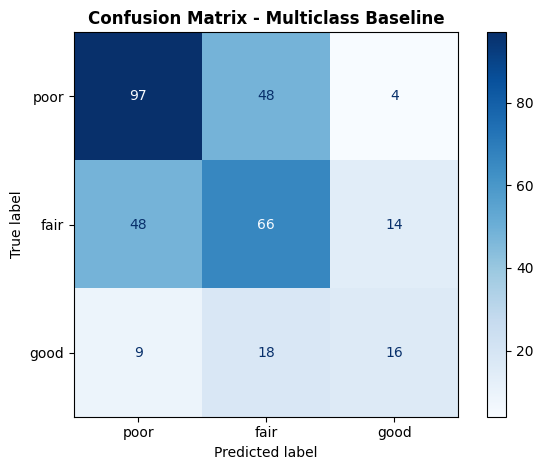

In [84]:
# Load and prepare the wine dataset
X = df.drop(['quality','quality_class'], axis=1)
y = df['quality_class']

# 1. Train baseline k-NN model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Baseline model without PCA
start_time = time.time()
baseline_model = KNeighborsClassifier(n_neighbors=3)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_time = time.time() - start_time

print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, baseline_pred):.4f}")
print(f"Training time: {baseline_time:.4f} seconds\n")

print(classification_report(y_test, baseline_pred))

cm = confusion_matrix(y_test, baseline_pred, labels=['poor', 'fair', 'good'])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['poor', 'fair', 'good']).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Multiclass Baseline', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()




#### Model with PCA

PCA Pipeline Performance:
Accuracy: 0.5719
Training time: 0.0080 seconds

              precision    recall  f1-score   support

        fair       0.57      0.54      0.56       128
        good       0.31      0.26      0.28        43
        poor       0.62      0.69      0.66       149

    accuracy                           0.57       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.56      0.57      0.57       320



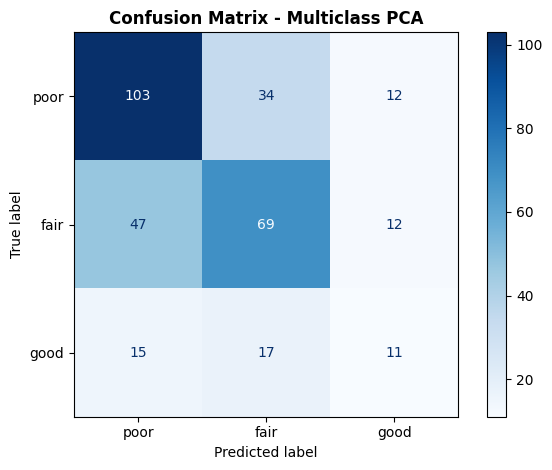

In [85]:
#Modelo con PCA
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

start_time = time.time()
pca_pipeline.fit(X_train, y_train)
pipeline_pred = pca_pipeline.predict(X_test)
pipeline_time = time.time() - start_time

print("PCA Pipeline Performance:")
print(f"Accuracy: {accuracy_score(y_test, pipeline_pred):.4f}")
print(f"Training time: {pipeline_time:.4f} seconds\n")

print(classification_report(y_test, pipeline_pred))

cm = confusion_matrix(y_test, pipeline_pred, labels=['poor', 'fair', 'good'])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['poor', 'fair', 'good']).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Multiclass PCA', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


##### Visualización

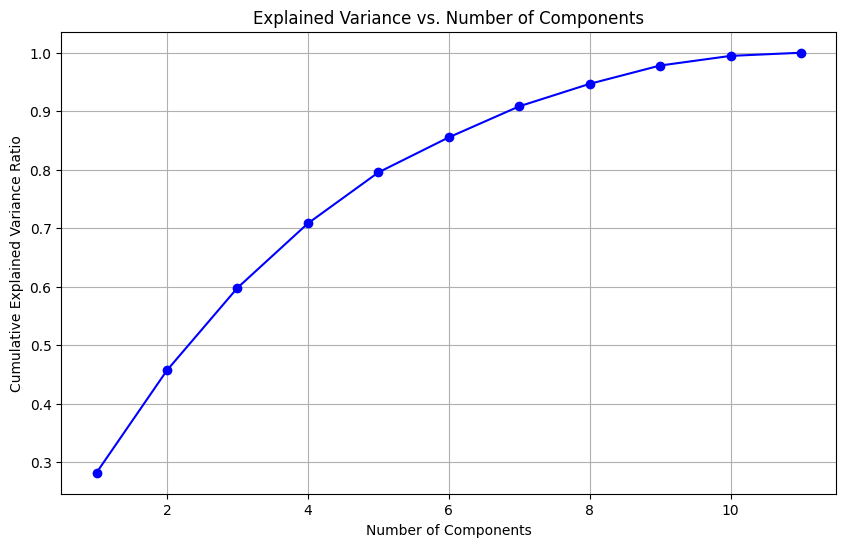

In [86]:
pca = PCA()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

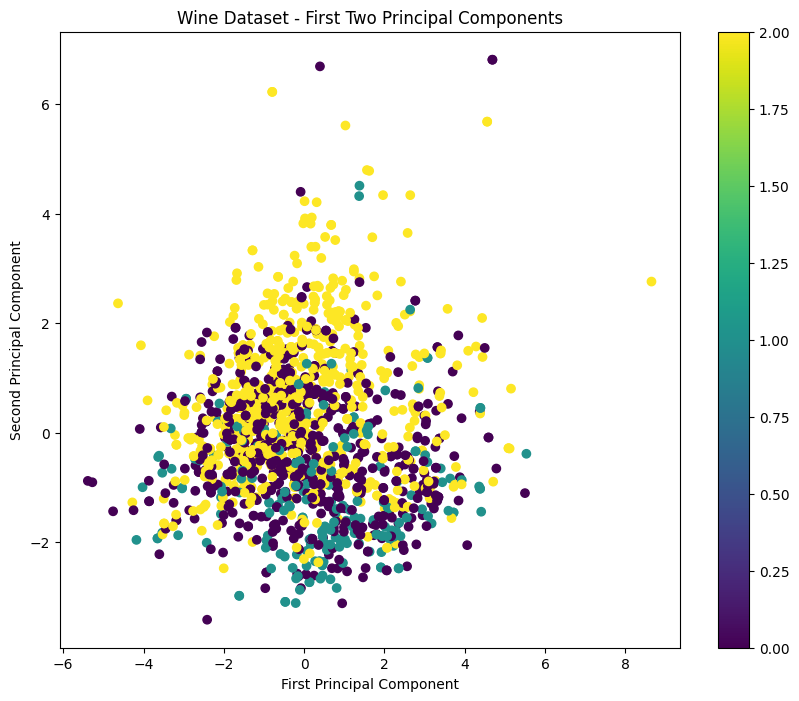

Explained variance ratio for first two components:
PC1: 0.2817
PC2: 0.1751
Total: 0.4568


In [87]:
#visualizacion de los componentes
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

le = LabelEncoder()
y = le.fit_transform(y)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title('Wine Dataset - First Two Principal Components')
plt.colorbar(scatter)
plt.show()

# Print the explained variance ratio for the first two components
print("Explained variance ratio for first two components:")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.4f}")
print(f"Total: {sum(pca_2d.explained_variance_ratio_):.4f}")

#### Binary Comparison

Three-Class Distribution:
 quality_class
good    855
poor    744
Name: count, dtype: int64


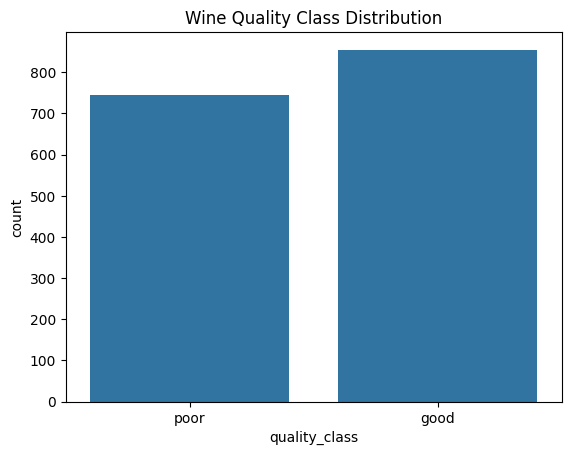

In [88]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df1 = pd.read_csv(url, sep=';')

# Convert quality scores to three classes
def quality_to_class(quality):
    if quality <= 5:
        return 'poor'
    else:
        return 'good'

# Add new column with three classes
df1['quality_class'] = df1['quality'].apply(quality_to_class)

# Show distribution of new classes
print("Three-Class Distribution:\n", df1['quality_class'].value_counts())

# Visualize class distribution
plt.figure()
sns.countplot(data=df1, x='quality_class', order=['poor', 'good'])
plt.title('Wine Quality Class Distribution')
plt.show()

Baseline Model Performance:
Accuracy: 0.7188
Training time: 0.0054 seconds

              precision    recall  f1-score   support

        good       0.73      0.76      0.74       171
        poor       0.71      0.67      0.69       149

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320



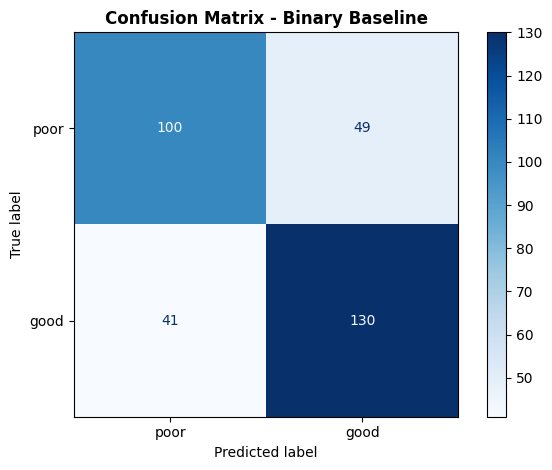

In [89]:
# Load and prepare the wine dataset
X = df1.drop(['quality','quality_class'], axis=1)
y = df1['quality_class']

# 1. Train baseline k-NN model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Baseline model without PCA
start_time = time.time()
baseline_model = KNeighborsClassifier(n_neighbors=3)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_time = time.time() - start_time

print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, baseline_pred):.4f}")
print(f"Training time: {baseline_time:.4f} seconds\n")

print(classification_report(y_test, baseline_pred))

cm = confusion_matrix(y_test, baseline_pred, labels=['poor', 'good'])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['poor', 'good']).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Binary Baseline', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()



#### Model with PCA

PCA Pipeline Performance:
Accuracy: 0.6250
Training time: 0.0068 seconds

              precision    recall  f1-score   support

        good       0.65      0.64      0.64       171
        poor       0.59      0.61      0.60       149

    accuracy                           0.62       320
   macro avg       0.62      0.62      0.62       320
weighted avg       0.63      0.62      0.63       320



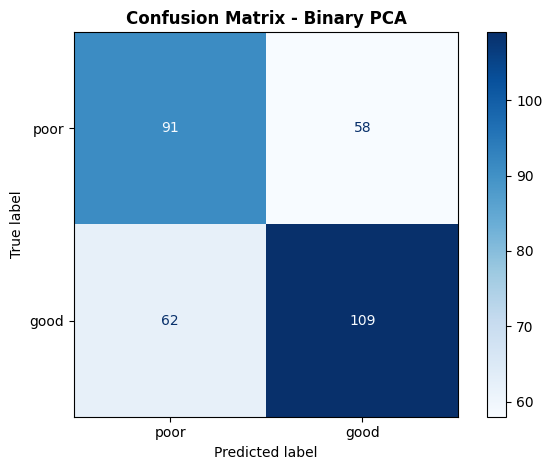

In [90]:
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

start_time = time.time()
pca_pipeline.fit(X_train, y_train)
pipeline_pred = pca_pipeline.predict(X_test)
pipeline_time = time.time() - start_time

print("PCA Pipeline Performance:")
print(f"Accuracy: {accuracy_score(y_test, pipeline_pred):.4f}")
print(f"Training time: {pipeline_time:.4f} seconds\n")

print(classification_report(y_test, pipeline_pred))

cm = confusion_matrix(y_test, pipeline_pred, labels=['poor', 'good'])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['poor', 'good']).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Binary PCA', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()



##### Visualización

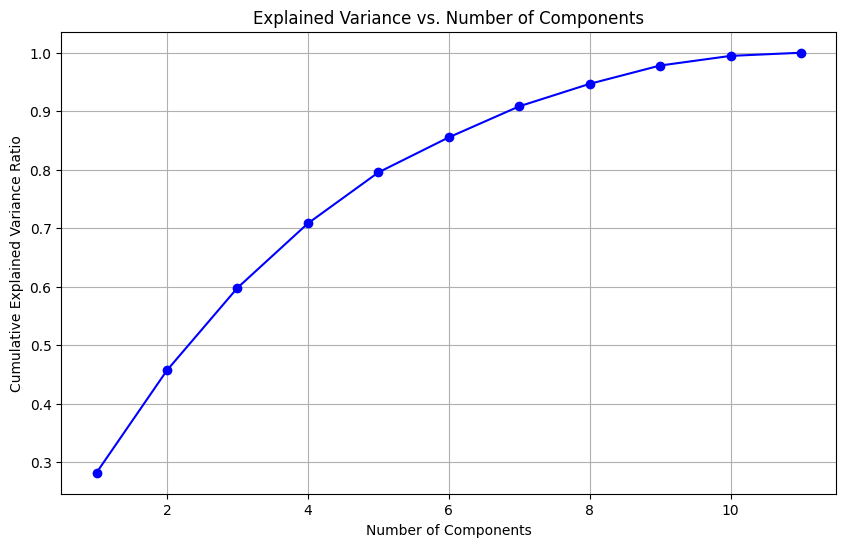

In [91]:
pca = PCA()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

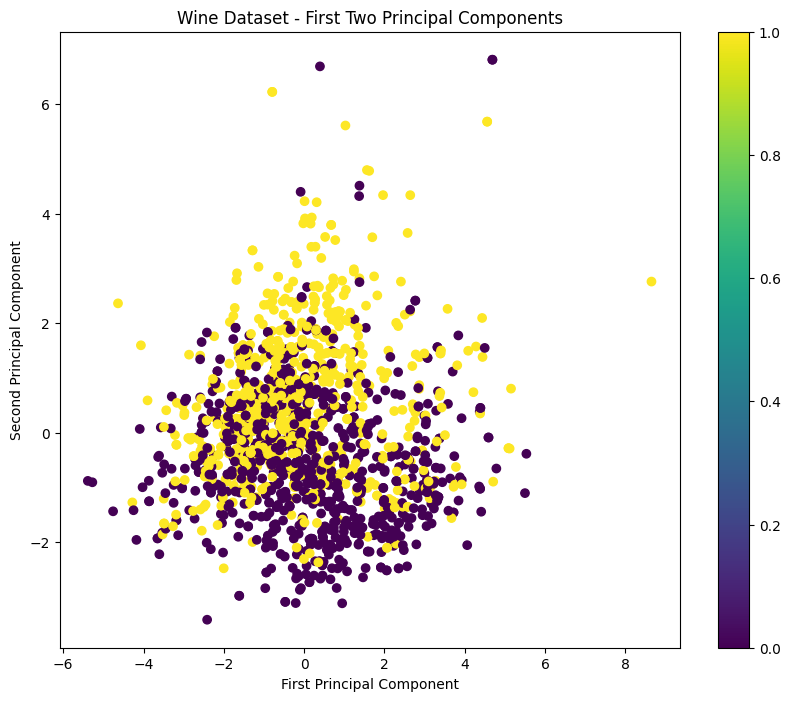

Explained variance ratio for first two components:
PC1: 0.2817
PC2: 0.1751
Total: 0.4568


In [92]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

le = LabelEncoder()
y = le.fit_transform(y)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title('Wine Dataset - First Two Principal Components')
plt.colorbar(scatter)
plt.show()

# Print the explained variance ratio for the first two components
print("Explained variance ratio for first two components:")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.4f}")
print(f"Total: {sum(pca_2d.explained_variance_ratio_):.4f}")